In [100]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from scipy.optimize import curve_fit

In [101]:
data = np.genfromtxt("decay_counts.csv", delimiter=",")
t = data[:, 0]
counts = data[:, 1]

In [102]:
def f(t, *p):
    A1, tau1, A2, tau2  = p
    return A1*np.exp(-t * np.log(2)/tau1) + A2*np.exp(-t * np.log(2)/tau2)

In [103]:
p0 = np.array([100, 5, 1, 100])

fit = curve_fit(
    f,
    t,
    counts,
    p0=p0
)[0]
print(fit)

[109.01692825   4.99358914   3.19954689 103.66761699]


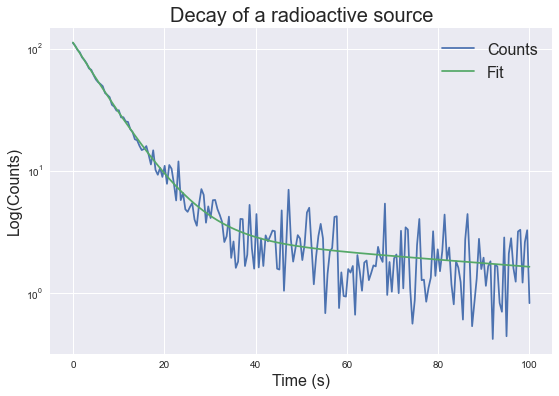

In [105]:
plt.figure(figsize=(9,6))
plt.plot(t, counts, label="Counts")
plt.plot(t, f(t, *fit), label="Fit")
plt.title("Decay of a radioactive source", fontsize=20)
plt.xlabel("Time (s)", fontsize=16)
plt.ylabel("Log(Counts)", fontsize=16)
plt.yscale("log")
plt.legend(fontsize=16)
plt.show()
plt.close()

# Answer: Half Lives
I found the half-life for the first, more abundant sample has is approximately 4.9936 seconds, while the second sample has a half-life of about 103.6676 seconds.

I didn't include a paramater for the noise; I tried adding a sine / constant function but it made the result worse.